# Content of the notebook

In this notebook we investigate the effect of the two additional features molecular weight and LogP-coefficient for the substrate for the Graph Neural Network. Therefore, we train and validate models with both, with only one, and with none of these features and compare the results. All models can either be trained or our pretrained weights can be loaded to validate the models. The notebook consists of the following steps:

1. Loading train, test, and validation data
2. Training a GNN with LogP and MW as additional input features
3. Training a GNN with MW as the only additional input feature
4. Training a GNN with LogP as the only additional input feature
5. Training a GNN without any additional input features
6. Comparing the performances and plotting figure 3 of our paper

All datasets are stored in one directory. The location of this directory can be changed (to the corresponding path on your PC) in the python file "directory_infomation.py".


Loading all the necessary packages and functions to execute the code:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as plticker
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

from directory_infomation import *
from functions_and_dicts_data_preprocessing_GNN import *
from build_GNN import *

plt.style.use('CCB_plot_style_0v4.mplstyle')
c_styles      = mpl.rcParams['axes.prop_cycle'].by_key()['color']   # fetch the defined color styles
high_contrast = ['#004488', '#DDAA33', '#BB5566', '#000000']        # define a high contrast color scheme

## 1. Loading train, test, and validation data

Before we load and create the data to train and validate our machine learning models, we have to calculate the feature vectors (for the atoms and bonds) for all MDL Molfiles (if they do not already exist). If the Molfiles have not yet been downlaoded (e.g. by executing the notebook "Downloading and preprocessing BRENDA data"), download all files with the following cell (otherwise skip it):

In [2]:
#download_mol_files()

In [3]:
calculate_atom_and_bond_feature_vectors()

In [4]:
brenda_train = pd.read_pickle(datasets_dir + "training_data.pkl")
[train_XE, train_X, train_A, train_extras, _, train_y] = create_input_and_output_data(
    df = brenda_train)

brenda_test = pd.read_pickle(datasets_dir + "test_data.pkl")
[test_XE, test_X, test_A, test_extras, _, test_y] = create_input_and_output_data(
    df = brenda_test)

brenda_valid = pd.read_pickle(datasets_dir + "validation_data.pkl")
[valid_XE, valid_X, valid_A, valid_extras, _, valid_y] = create_input_and_output_data(
    df = brenda_valid)

## 2. Training a GNN with LogP and MW as additional input features

In [5]:
# Set regularization rates
l2_reg_conv = 0.05 
l2_reg_fc = 0.2

### (a) Training the Graph Neural Network:
Uncomment the following cell for newly training the model:

In [6]:
'''
model = DMPNN(l2_reg_conv = l2_reg_conv, l2_reg_fc = l2_reg_fc, learning_rate = 0.1,
                  D = 100, N = N, F1 = F1, F2 = F2, F= F, drop_rate = 0,ada_rho = 0.95)

model.optimizer.learning_rate.assign(1e-1)
model.fit([np.array(train_XE), np.array(train_X), np.array(train_A), np.array(train_extras)], np.array(train_y),
          epochs=40, batch_size=64, shuffle = True, verbose = 1,
         validation_data=([np.array(valid_XE), np.array(valid_X), np.array(valid_A), np.array(valid_extras)],
                           np.array(valid_y)))

pred_test = model.predict([np.array(test_XE), np.array(test_X), np.array(test_A), np.array(test_extras)])
print(r2_score(np.reshape(test_y, (-1,1)), pred_test))
print(np.mean(abs(pred_test - np.reshape(test_y, (-1,1)))**2))


model.optimizer.learning_rate.assign(1e-2)
model.fit([np.array(train_XE), np.array(train_X), np.array(train_A), np.array(train_extras)], np.array(train_y),
          epochs=10, batch_size=64, shuffle = True, verbose = 1,
         validation_data=([np.array(valid_XE), np.array(valid_X), np.array(valid_A), np.array(valid_extras)],
                           np.array(valid_y))) 
''';

If the model shall not be trained again, the parameters of the already trained model can be loaded with the following cell. If model was newly trained, do not execute the following cell.

In [7]:
model = DMPNN(l2_reg_conv = l2_reg_conv, l2_reg_fc = l2_reg_fc, learning_rate = 0.1,
                  D = 100, N = N, F1 = F1, F2 = F2, F= F, drop_rate = 0,ada_rho = 0.95)

model.load_weights(datasets_dir + "\model_weights\GCN_D100_MW_LogP")

### (b) Validating the model:

In [8]:
pred_test = model.predict([np.array(test_XE), np.array(test_X), np.array(test_A), np.array(test_extras)])
test_MSE_LogP_MW = np.mean(abs(pred_test - np.reshape(test_y, (-1,1)))**2)
test_R2_LogP_MW = r2_score(np.reshape(test_y, (-1,1)), pred_test)
print("Performance on the test set:")
print("R² value: %s" % test_R2_LogP_MW)
print("Mean squared error (MSE): %s" % test_MSE_LogP_MW)

pred_valid = model.predict([np.array(valid_XE), np.array(valid_X), np.array(valid_A), np.array(valid_extras)])
valid_MSE_LogP_MW = np.mean(abs(pred_valid - np.reshape(valid_y, (-1,1)))**2)
valid_R2_LogP_MW = r2_score(np.reshape(valid_y, (-1,1)), pred_valid)
print("\n Performance on the validation set:")
print("R² value: %s" % valid_R2_LogP_MW)
print("Mean squared error (MSE): %s" % valid_MSE_LogP_MW)

Performance on the test set:
R² value: 0.3555520051085065
Mean squared error (MSE): 0.796735318591988

 Performance on the validation set:
R² value: 0.418989774819409
Mean squared error (MSE): 0.7076457985639311


## 3. Training a GNN with MW as the only additional input feature

### (a) Training the Graph Neural Network:
Uncomment the following cell for newly training the model:

In [9]:
'''
model = DMPNN_with_one_extra_feature(l2_reg_conv = l2_reg_conv*1, l2_reg_fc = l2_reg_fc*1, learning_rate = 0.1,
                  D = 100, N = N, F1 = F1, F2 = F2, F= F, drop_rate = 0,ada_rho = 0.95)
model.optimizer.learning_rate.assign(1e-1)
model.fit([np.array(train_XE), np.array(train_X), np.array(train_A), np.array(train_extras)[:,0]], np.array(train_y),
          epochs=40, batch_size=64, shuffle = True, verbose = 1)

model.optimizer.learning_rate.assign(1e-2)
model.fit([np.array(train_XE), np.array(train_X), np.array(train_A), np.array(train_extras)[:,0]], np.array(train_y),
          epochs=10, batch_size=64, shuffle = True, verbose = 1)
''';

If the model shall not be trained again, the parameters of the already trained model can be loaded with the following cell. If model was newly trained, do not execute the following cell.

In [10]:
model = DMPNN_with_one_extra_feature(l2_reg_conv = l2_reg_conv*1, l2_reg_fc = l2_reg_fc*1, learning_rate = 0.1,
                  D = 100, N = N, F1 = F1, F2 = F2, F= F, drop_rate = 0,ada_rho = 0.95)
model.load_weights(datasets_dir + "\model_weights\GCN_D100_with_MW")

### (b) Validating the model:

In [11]:
pred_test = model.predict([np.array(test_XE), np.array(test_X), np.array(test_A), np.array(test_extras)[:,0]])
test_MSE_MW = np.mean(abs(pred_test - np.reshape(test_y, (-1,1)))**2)
test_R2_MW = r2_score(np.reshape(test_y, (-1,1)), pred_test)
print("Performance on the test set:")
print("R² value: %s" % test_R2_MW)
print("Mean squared error (MSE): %s" % test_MSE_MW)

pred_valid = model.predict([np.array(valid_XE), np.array(valid_X), np.array(valid_A), np.array(valid_extras)[:,0]])
valid_MSE_MW = np.mean(abs(pred_valid - np.reshape(valid_y, (-1,1)))**2)
valid_R2_MW = r2_score(np.reshape(valid_y, (-1,1)), pred_valid)
print("\n Performance on the validation set:")
print("R² value: %s" % valid_R2_MW)
print("Mean squared error (MSE): %s" % valid_MSE_MW)

Performance on the test set:
R² value: 0.3491014564245025
Mean squared error (MSE): 0.8047101745952382

 Performance on the validation set:
R² value: 0.4184489469357807
Mean squared error (MSE): 0.708304503975659


## 4. Training a GNN with LogP as the only additional input feature

### (a) Training the Graph Neural Network:
Uncomment the following cell for newly training the model:

In [12]:
'''
model = DMPNN_with_one_extra_feature(l2_reg_conv = l2_reg_conv, l2_reg_fc = l2_reg_fc, learning_rate = 0.1,
                  D = 100, N = N, F1 = F1, F2 = F2, F= F, drop_rate = 0,ada_rho = 0.95)
model.optimizer.learning_rate.assign(1e-1)
model.fit([np.array(train_XE), np.array(train_X), np.array(train_A), np.array(train_extras)[:,1]], np.array(train_y),
          epochs=40, batch_size=64, shuffle = True, verbose = 1)

model.optimizer.learning_rate.assign(1e-2)
model.fit([np.array(train_XE), np.array(train_X), np.array(train_A), np.array(train_extras)[:,1]], np.array(train_y),
          epochs=10, batch_size=64, shuffle = True, verbose = 1)
''';

If the model shall not be trained again, the parameters of the already trained model can be loaded with the following cell. If model was newly trained, do not execute the following cell.

In [13]:
model = DMPNN_with_one_extra_feature(l2_reg_conv = l2_reg_conv, l2_reg_fc = l2_reg_fc, learning_rate = 0.1,
                  D = 100, N = N, F1 = F1, F2 = F2, F= F, drop_rate = 0,ada_rho = 0.95)
model.load_weights(datasets_dir + "model_weights\GCN_D100_with_LogP")

### (b) Validating the model:

In [14]:
pred_test = model.predict([np.array(test_XE), np.array(test_X), np.array(test_A), np.array(test_extras)[:,1]])
test_MSE_LogP = np.mean(abs(pred_test - np.reshape(test_y, (-1,1)))**2)
test_R2_LogP = r2_score(np.reshape(test_y, (-1,1)), pred_test)
print("Performance on the test set:")
print("R² value: %s" % test_R2_LogP)
print("Mean squared error (MSE): %s" % test_MSE_LogP)

pred_valid = model.predict([np.array(valid_XE), np.array(valid_X), np.array(valid_A), np.array(valid_extras)[:,1]])
valid_MSE_LogP = np.mean(abs(pred_valid - np.reshape(valid_y, (-1,1)))**2)
valid_R2_LogP = r2_score(np.reshape(valid_y, (-1,1)), pred_valid)
print("\n Performance on the validation set:")
print("R² value: %s" % valid_R2_LogP)
print("Mean squared error (MSE): %s" % valid_MSE_LogP)

Performance on the test set:
R² value: 0.35565728770544114
Mean squared error (MSE): 0.7966051570210375

 Performance on the validation set:
R² value: 0.4222641053251659
Mean squared error (MSE): 0.7036578029571612


## 5. Training a GNN without any additional input features

### (a) Training the Graph Neural Network:
Uncomment the following cell for newly training the model:

In [15]:
'''model = DMPNN_without_extra_features(l2_reg_conv = l2_reg_conv, l2_reg_fc = l2_reg_fc, learning_rate = 0.1,
                  D = 100, N = N, F1 = F1, F2 = F2, F= F, drop_rate = 0,ada_rho = 0.95)
model.optimizer.learning_rate.assign(1e-1)
model.fit([np.array(train_XE), np.array(train_X), np.array(train_A), np.array(train_extras)], np.array(train_y),
          epochs=40, batch_size=64, shuffle = True, verbose = 1)

model.optimizer.learning_rate.assign(1e-2)
model.fit([np.array(train_XE), np.array(train_X), np.array(train_A), np.array(train_extras)], np.array(train_y),
          epochs=10, batch_size=64, shuffle = True, verbose = 1)
''';

If the model shall not be trained again, the parameters of the already trained model can be loaded with the following cell. If model was newly trained, do not execute the following cell.

In [16]:
model = DMPNN_without_extra_features(l2_reg_conv = l2_reg_conv, l2_reg_fc = l2_reg_fc, learning_rate = 0.1,
                  D = 100, N = N, F1 = F1, F2 = F2, F= F, drop_rate = 0,ada_rho = 0.95)
model.load_weights(datasets_dir + "model_weights\GCN_D100_without_extra_features")

### (b) Validating the model:

In [17]:
pred_test = model.predict([np.array(test_XE), np.array(test_X), np.array(test_A), np.array(test_extras)])
test_MSE = np.mean(abs(pred_test - np.reshape(test_y, (-1,1)))**2)
test_R2 = r2_score(np.reshape(test_y, (-1,1)), pred_test)
print("Performance on the test set:")
print("R² value: %s" % test_R2)
print("Mean squared error (MSE): %s" % test_MSE)

pred_valid = model.predict([np.array(valid_XE), np.array(valid_X), np.array(valid_A),  np.array(valid_extras)])
valid_MSE = np.mean(abs(pred_valid - np.reshape(valid_y, (-1,1)))**2)
valid_R2 = r2_score(np.reshape(valid_y, (-1,1)), pred_valid)
print("\n Performance on the validation set:")
print("R² value: %s" % valid_R2)
print("Mean squared error (MSE): %s" % valid_MSE)

Performance on the test set:
R² value: 0.33576870426789807
Mean squared error (MSE): 0.8211935442719315

 Performance on the validation set:
R² value: 0.40462223743381664
Mean squared error (MSE): 0.7251448493998512


## 6. Comparing the performances and plotting figure 3 of our paper

#### Figure 3a:

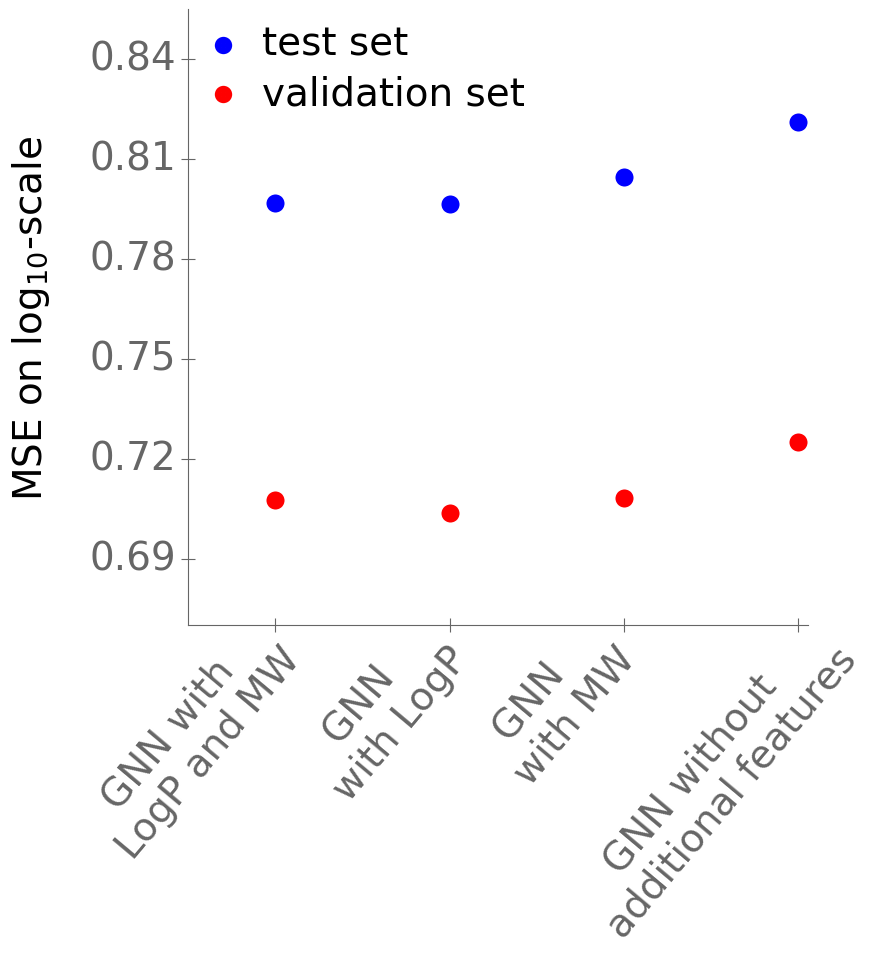

In [20]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})

plt.scatter(1, test_MSE_LogP_MW , c='blue', marker='o', linewidths= 8, label = "test set")
plt.scatter(1, valid_MSE_LogP_MW, c='red', marker='o', linewidths= 8, label = "validation set")

plt.scatter(3, test_MSE_MW, c='blue', marker='o', linewidths= 8)
plt.scatter(3, valid_MSE_MW, c='red', marker='o', linewidths= 8)

plt.scatter(2, test_MSE_LogP, c='blue', marker='o', linewidths= 8)
plt.scatter(2, valid_MSE_LogP, c='red', marker='o', linewidths= 8)

plt.scatter(4, test_MSE, c='blue', marker='o', linewidths= 8)
plt.scatter(4, valid_MSE, c='red', marker='o', linewidths= 8)

plt.ylim(0.67, 0.855)

ticks1 = [1,2,3,4]
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)

ticks2 = [0.5, 1.6, 2.6, 3.5]
labs = ["GNN with \n LogP and MW", "GNN \n with LogP", "GNN  \n with MW", "GNN without \n additional features"]
ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= 0.03)
ax.tick_params(axis='x', which="minor",length=0, rotation = 50)
loc = plticker.MultipleLocator(base=0.03) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)

plt.ylabel("MSE on $\log_{10}$-scale")
ax.yaxis.set_label_coords(-0.22, 0.5)
plt.legend(loc = "upper left")
plt.show()

#### Figure 3b:

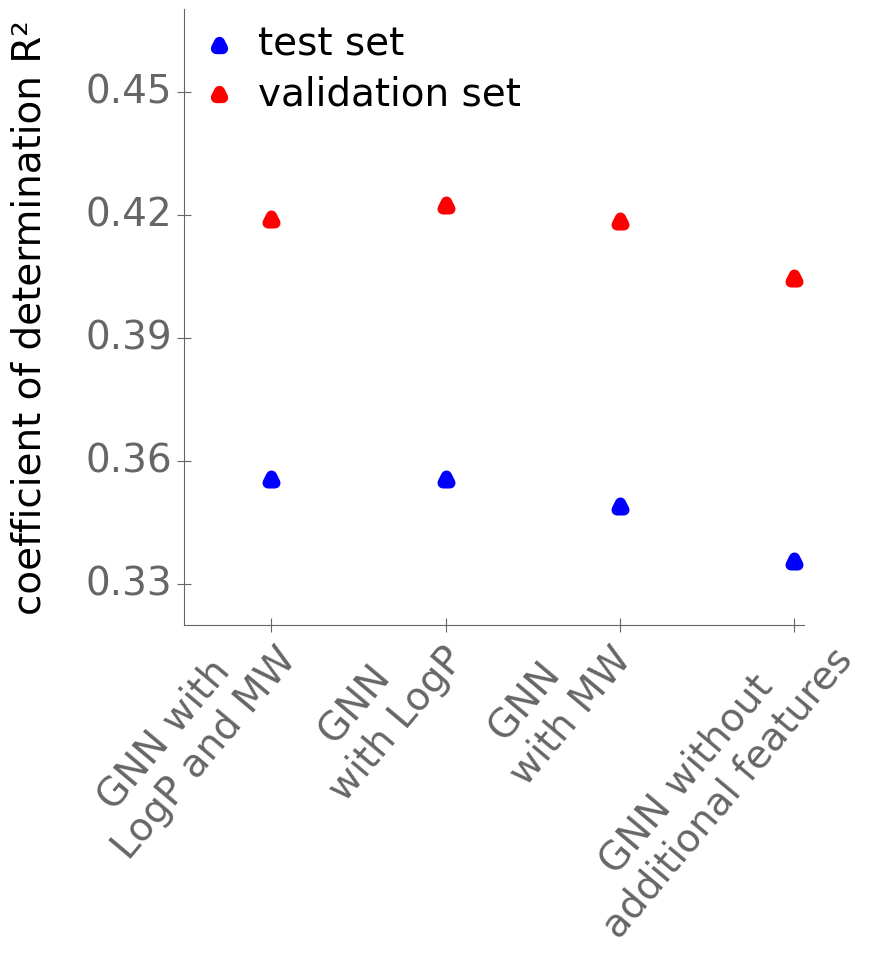

In [19]:
fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})
labs = ["GNN with \n LogP and MW", "GNN \n with LogP", "GNN  \n with MW", "GNN without \n additional features"]

plt.scatter(1, test_R2_LogP_MW , c='blue', marker='^', linewidths= 8, label = "test set")
plt.scatter(1, valid_R2_LogP_MW, c='red', marker='^', linewidths= 8, label = "validation set")

plt.scatter(3, test_R2_MW, c='blue', marker='^', linewidths= 8)
plt.scatter(3, valid_R2_MW, c='red', marker='^', linewidths= 8)

plt.scatter(2, test_R2_LogP, c='blue', marker='^', linewidths= 8)
plt.scatter(2, valid_R2_LogP, c='red', marker='^', linewidths= 8)

plt.scatter(4, test_R2, c='blue', marker='^', linewidths= 8)
plt.scatter(4, valid_R2, c='red', marker='^', linewidths= 8)


plt.ylim(0.32, 0.47)
ticks1 = [1,2,3,4]

ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)
ticks2 = [0.5, 1.6, 2.6, 3.5]

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= 0.03)
ax.tick_params(axis='x', which="minor",length=0, rotation = 50)

ax.yaxis.set_major_locator(loc)

plt.ylabel("coefficient of determination R²")
ax.yaxis.set_label_coords(-0.22, 0.5)
plt.legend(loc = "upper left")
plt.show()